# Triaction package
<img src="3action.png" width=200 height=100>

In [1]:
from analysis import triadic_analysis
import matplotlib.pyplot as plt
import matplotlib as mpl
import pyitlibnew as drv
import networkx as nx
import seaborn as sns
import pandas as pd
import scipy as sp
import numpy as np
import glob
import os

In [2]:
# Load already run data
gene_expression = pd.read_csv('data/reduce_gene_expression.tsv', sep = '\t', index_col=0)
sub_triadic = pd.read_csv('data/triadic_data_5000.tsv', sep = '\t')
std_array = sub_triadic['std']
std_null_array = sub_triadic['std_null']
corr_array = sub_triadic['corr']
zscore_array = sub_triadic['zscore']
T_array = sub_triadic['T']
T_null_array = sub_triadic['T_null']
T_zscore_array = sub_triadic['T_zscore'] 
Tn_array = sub_triadic['Tn']
Tn_null_array = sub_triadic['Tn_null'] 
Tn_zscore_array = sub_triadic['Tn_zscore'] 
MI_XY_array = sub_triadic['MI_XY']
MIC_array = sub_triadic['MIC']

In [3]:
sub_triadic_sorted = sub_triadic.sort_values(by='std', ascending = False)
print(sub_triadic_sorted)

      Unnamed: 0     reg  node1  node2       std      corr  std_null  \
109          109   HOXB5  HOXB7  HOXB8  0.822530  0.857483      0.21   
1              1   HOXB6  HOXA3  HOXA9  0.818464 -0.874507      0.25   
14            14   HOXA9  HOXB7  HOXB8  0.817642  0.953594      0.21   
0              0   HOXB6  HOXA5  HOXA9  0.812975 -0.810190      0.22   
2              2    PBX3  HOXA3  HOXA5  0.809863 -0.723934      0.23   
...          ...     ...    ...    ...       ...       ...       ...   
645          645   SMAD4  GATA1   PAX5  0.040192  0.250023      0.17   
2145        2145    RELA   EGR1    FOS  0.038760  0.700429      0.17   
3727        3727    RELA    JUN    WT1  0.037844  0.327467      0.18   
4759        4759     SRY     AR   THRB  0.037031 -0.105553      0.19   
269          269  ZNF202  GATA1   MAFB  0.026181  0.605700      0.17   

        zscore         T  T_null  T_zscore        Tn  Tn_null  Tn_zscore  \
109   9.705626  1.133458    0.33  7.390519  1.654235     0.

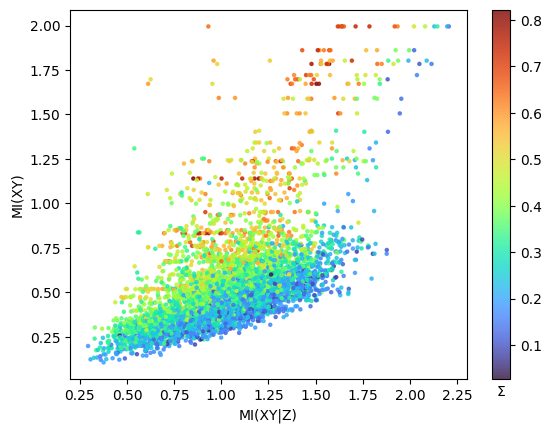

In [4]:
# Visualise MI(X,Y) and MI(X,Y|X) with the value of Sigma (measure to detect triadic interaction
x = MIC_array
y = MI_XY_array
z = std_array
plt.scatter(x, y, c=z, s = 5, alpha=0.8, cmap = 'turbo')
plt.xlabel('MI(XY|Z)', fontsize=10, color='black')
plt.ylabel('MI(XY)', fontsize=10,color='black')
cbar = plt.colorbar()
cbar.ax.set_xlabel('$\mathregular{\Sigma}$', rotation=0, fontsize=10)
plt.savefig('output/MI.png', format = 'png', dpi = 600)
plt.show()

In [14]:
Z

array([13.20021185, 12.88627264, 13.19518758, 13.79479565, 12.93121002,
       12.85802204, 12.67214911, 13.10535828, 13.11233441, 12.56262591,
       13.63956794, 12.94258853, 12.99575517, 12.59393378, 13.15474888,
       12.6513034 , 13.12973157, 13.5803606 , 13.37918082, 12.92876886,
       12.73736412, 13.21276979, 12.97705905, 12.68010669, 13.58756437,
       12.96886897, 12.17800898, 13.23594219, 12.7627069 , 12.34114405,
       13.05059088, 12.38408671, 12.87913124, 13.19018349, 13.27308021,
       12.87491532, 12.51676568, 13.06003346, 13.20272816, 12.97396877,
       12.65012006, 13.81604982, 12.90149388, 13.46753504, 13.35999685,
       13.00987371, 12.77297469, 12.98643411, 13.12506648, 12.95563502,
       12.94859491, 12.95563502, 12.92532152, 13.4155159 , 12.96174376,
       12.48354141, 13.16316935, 10.98575271, 13.7044667 , 12.69171567,
       12.58986665, 12.91695797, 13.59482699, 12.90246832, 13.18895532,
       13.25448489, 13.79256686, 13.4017085 , 13.1907981 , 12.99

In [5]:
from pyitlibnew import preprocess
from analysis import stats

name_X = 'MEIS1'
name_Y = 'HOXA9'
name_Z = 'PBX3' 
X = np.array(gene_expression.T[name_X])
Y = np.array(gene_expression.T[name_Y])
Z = np.array(gene_expression.T[name_Z])
bins = 5
rounded = 0

X, Y, Z, X_sort, Y_sort = drv.preprocess(X, Y, Z, num = bins, tol = rounded, XY_sort = True)
std, std_null, corr, zscore, T, T_null, T_zscore, Tn, Tn_null, Tn_zscore, MI_XY, MIC = stats(X, Y, Z, num = bins)
print('Sigma: ', std)
print('Sigma_null: ', std_null)
print('corr: ', corr)
print('z_score: ', zscore)
print('MIC:', MIC)
print('MI_XY:', MI_XY)

Sigma:  0.7240905171717256
Sigma_null:  0.21
corr:  -0.9672384692992706
z_score:  6.763804391909003
MIC: 1.3146199920982862
MI_XY: 1.236687125917915


Sigma:  0.7240905171717256
Sigma_null:  0.22
corr:  -0.9672384692992706
z_score:  6.926909145721579
MIC: 1.3146199920982862
MI_XY: 1.236687125917915


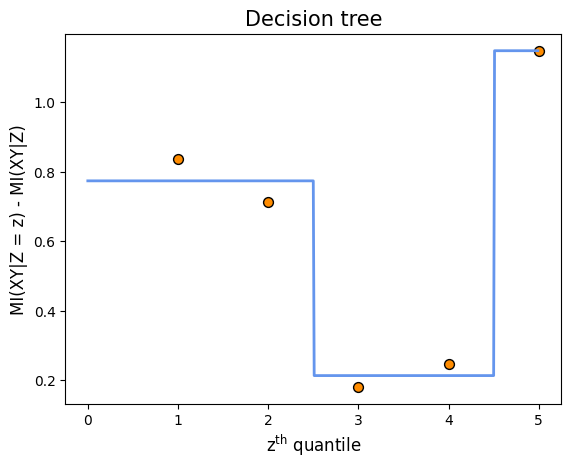

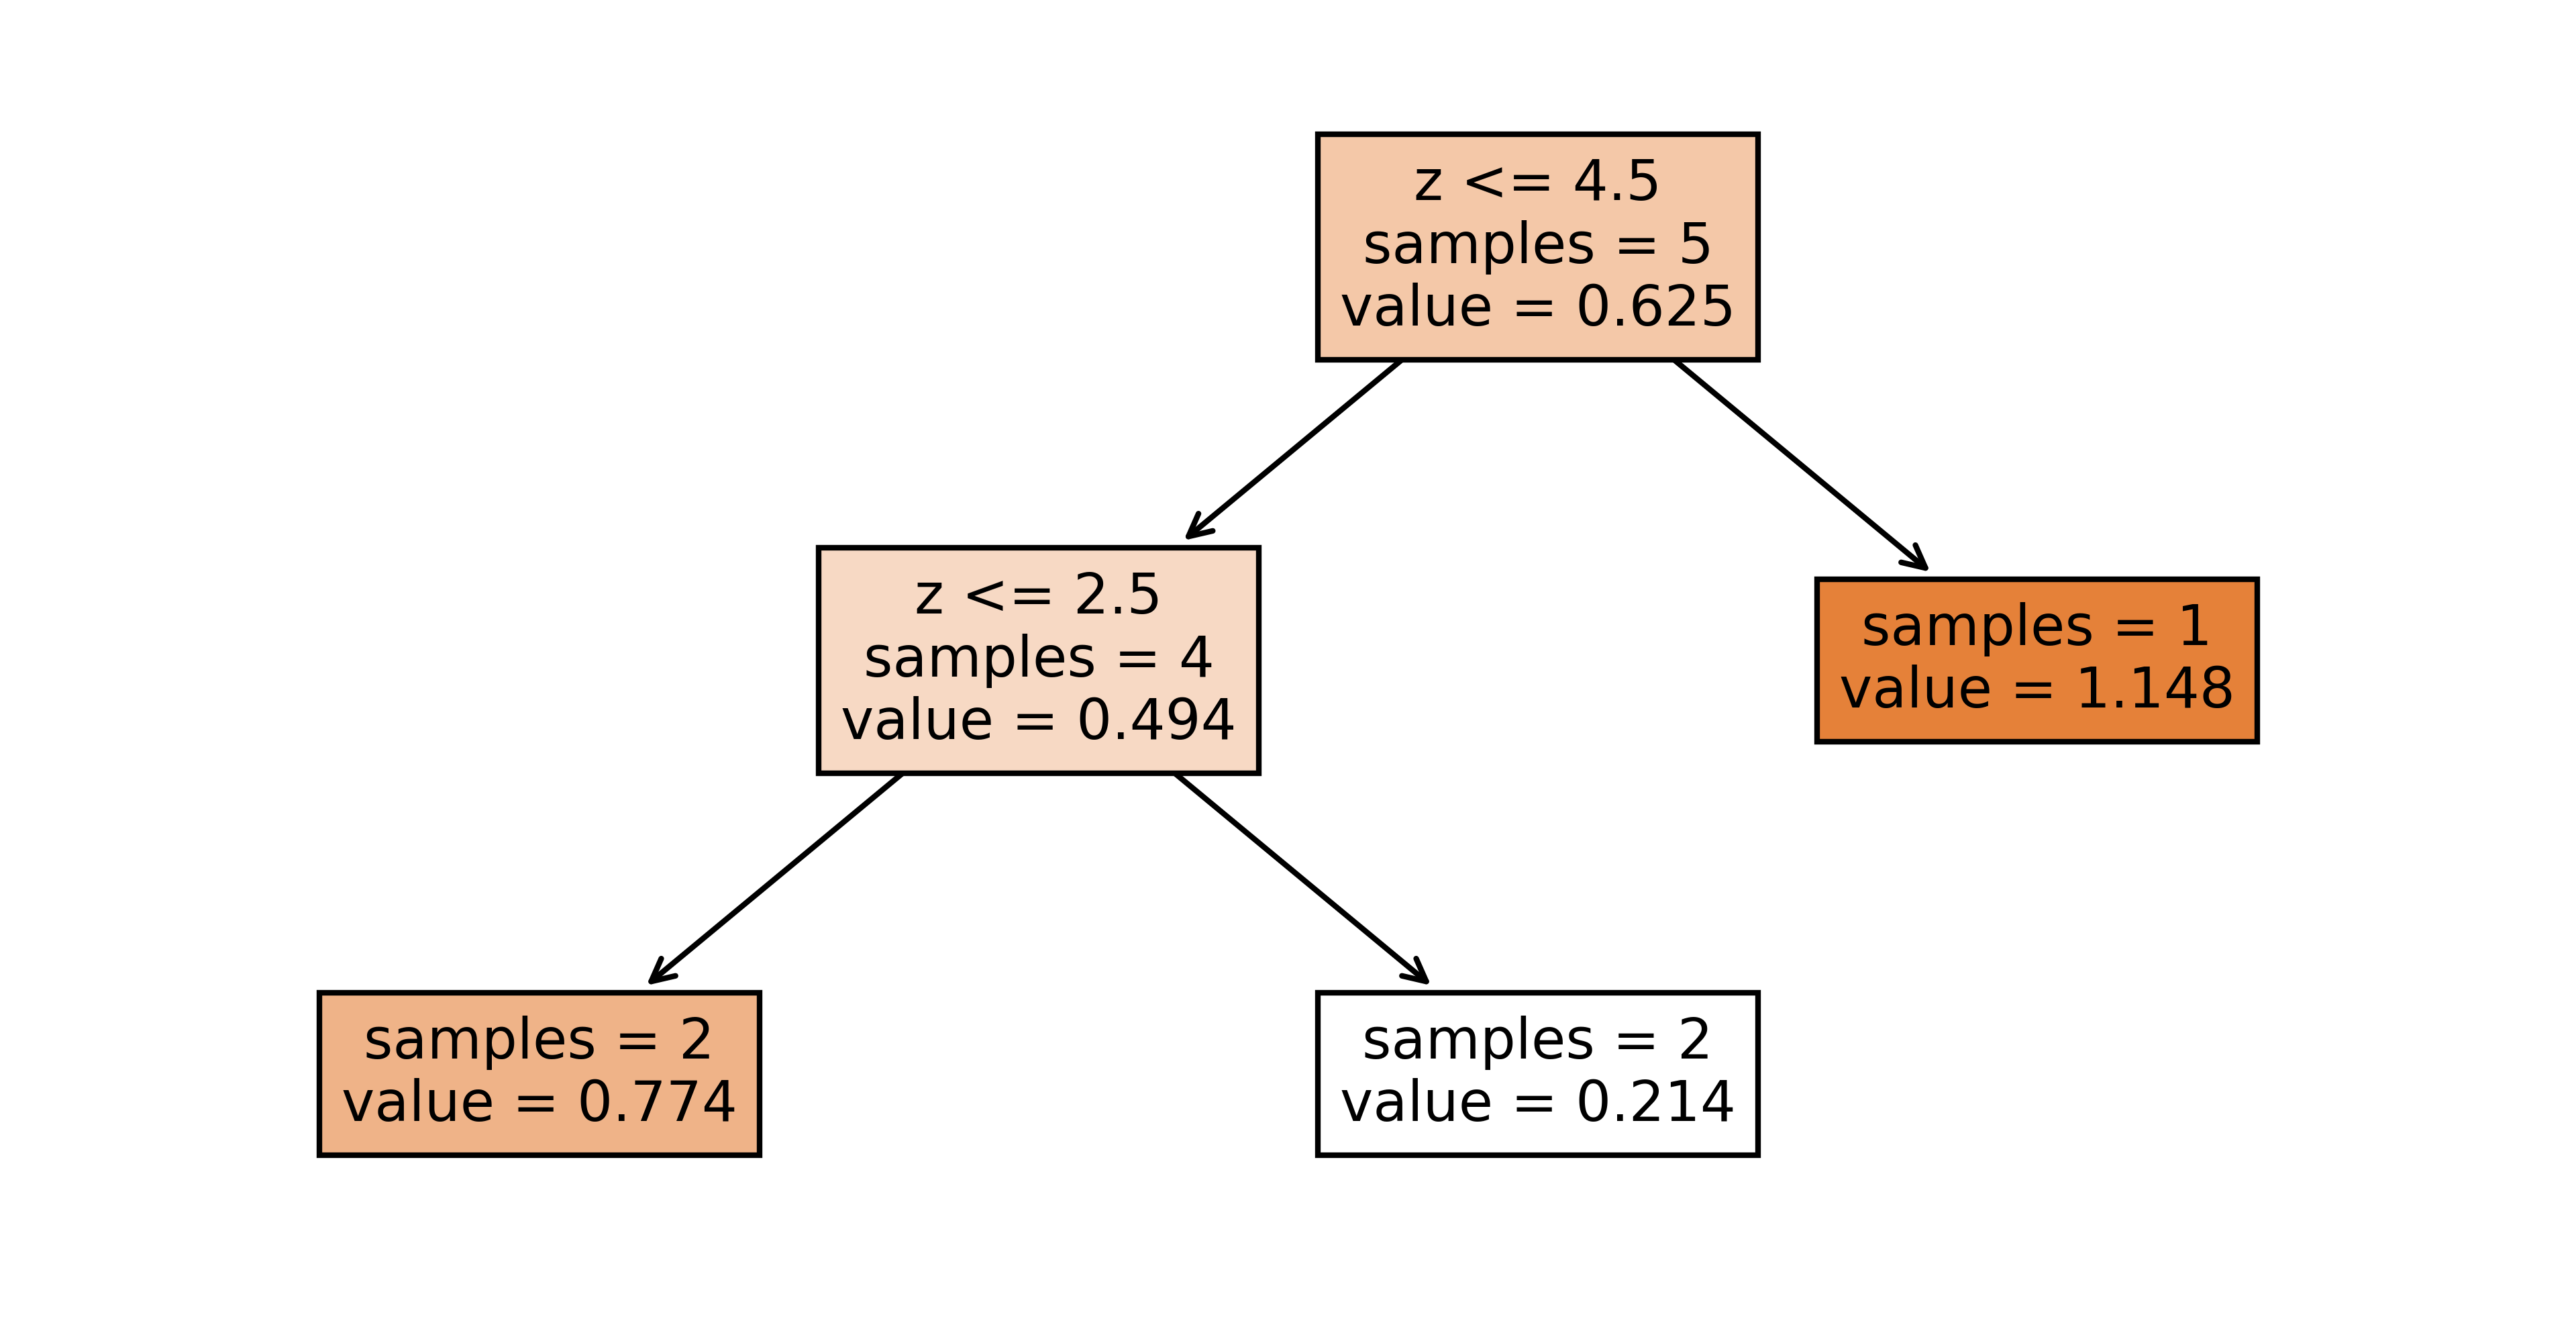

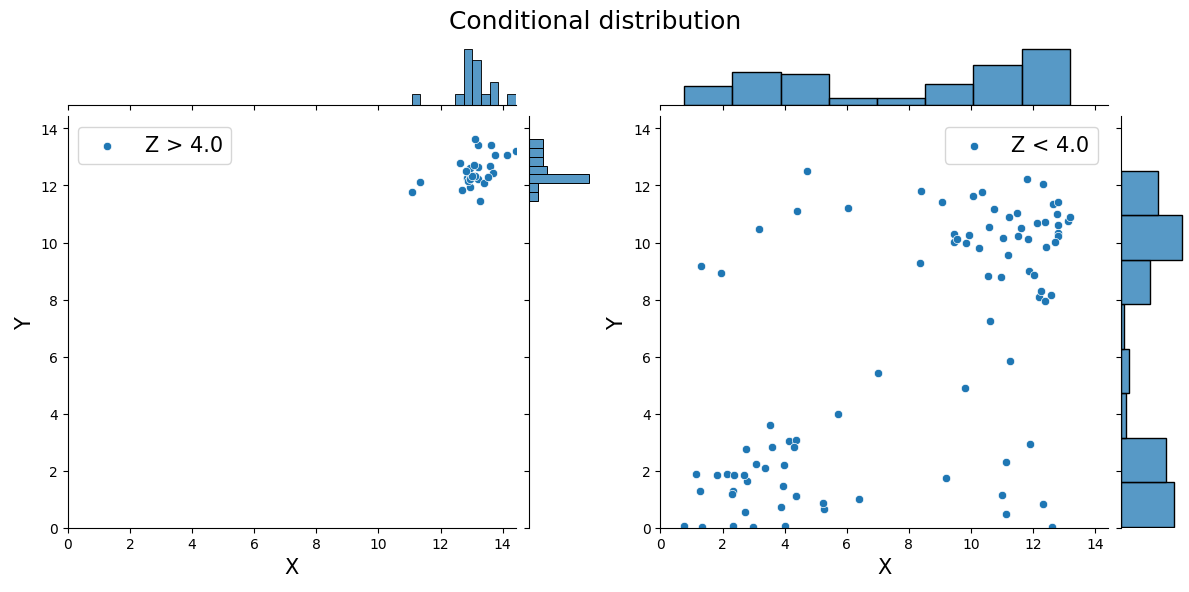

In [15]:
name_X = 'MEIS1'
name_Y = 'HOXA9'
name_Z = 'PBX3' 
X = np.array(gene_expression.T[name_X])
Y = np.array(gene_expression.T[name_Y])
Z = np.array(gene_expression.T[name_Z])
bins = 5

triadic_analysis(X, Y, Z, bins, save_folder = 'output')

Sigma:  0.06877360375716575
Sigma_null:  0.19
corr:  0.7757503074034419
z_score:  1.9626420962782816
MIC: 1.4383435748360758
MI_XY: 0.5161285643064479


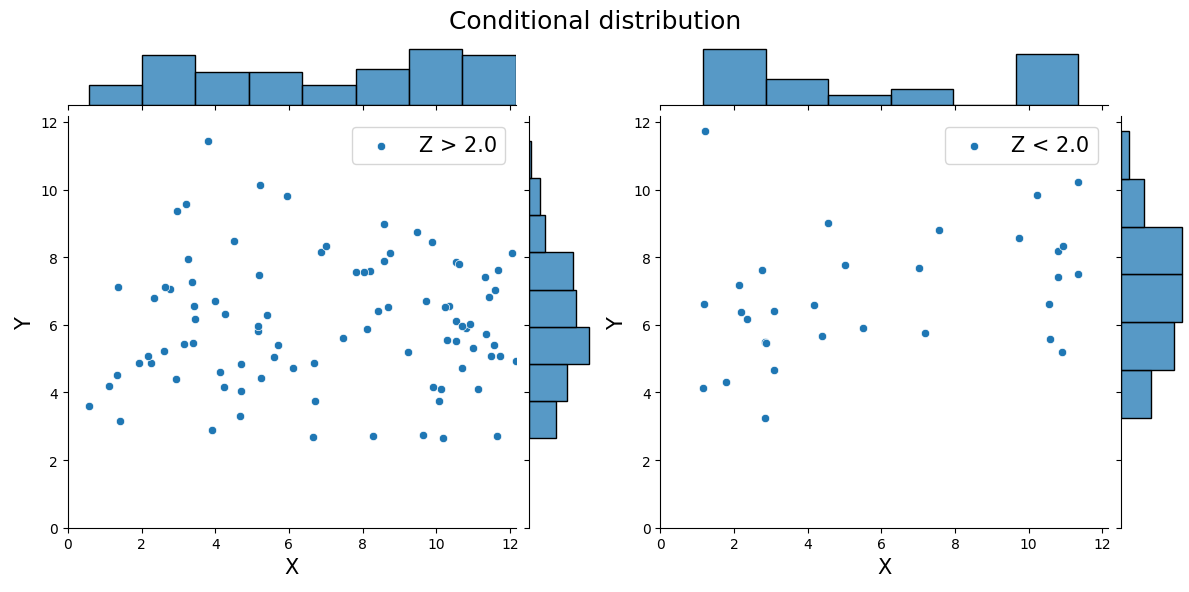

In [19]:
name_X = 'AR'
name_Y = 'NR4A3'
name_Z = 'FLI1' 
X = np.array(gene_expression.T[name_X])
Y = np.array(gene_expression.T[name_Y])
Z = np.array(gene_expression.T[name_Z])
bins = 5
rounded = 0

triadic_analysis(X, Y, Z, bins, tol = rounded, th = 4, save_folder = 'output')

In [8]:
from triadic_vis import triadic_network_vis_from_data_and_graph
from triadic_vis import triadic_network_vis_from_scratch
from triadic_vis import triadic_network_vis_from_data

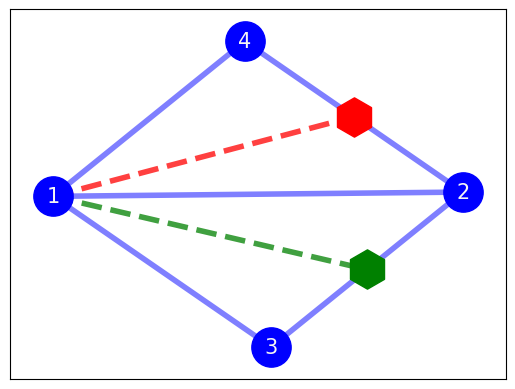

In [9]:
structural_nodes = [1, 2, 3, 4]
structural_edges = [(1,2),(1,3),(2,3),(1,4),(2,4)]
pos_regulatory_nodes = [23]
pos_regulatory_edges = [(1,23)]
neg_regulatory_nodes = [24]
neg_regulatory_edges = [(1,24)]
regulatory_nodes = pos_regulatory_nodes + neg_regulatory_nodes
regulatory_edges = pos_regulatory_edges + neg_regulatory_edges
connected_edges = [(2,23),(3,23),(2,24),(4,24)]

triadic_network_vis_from_scratch(structural_nodes, structural_edges, \
                        pos_regulatory_nodes, pos_regulatory_edges, \
                        neg_regulatory_nodes, neg_regulatory_edges, \
                        connected_edges, save_folder = 'output')

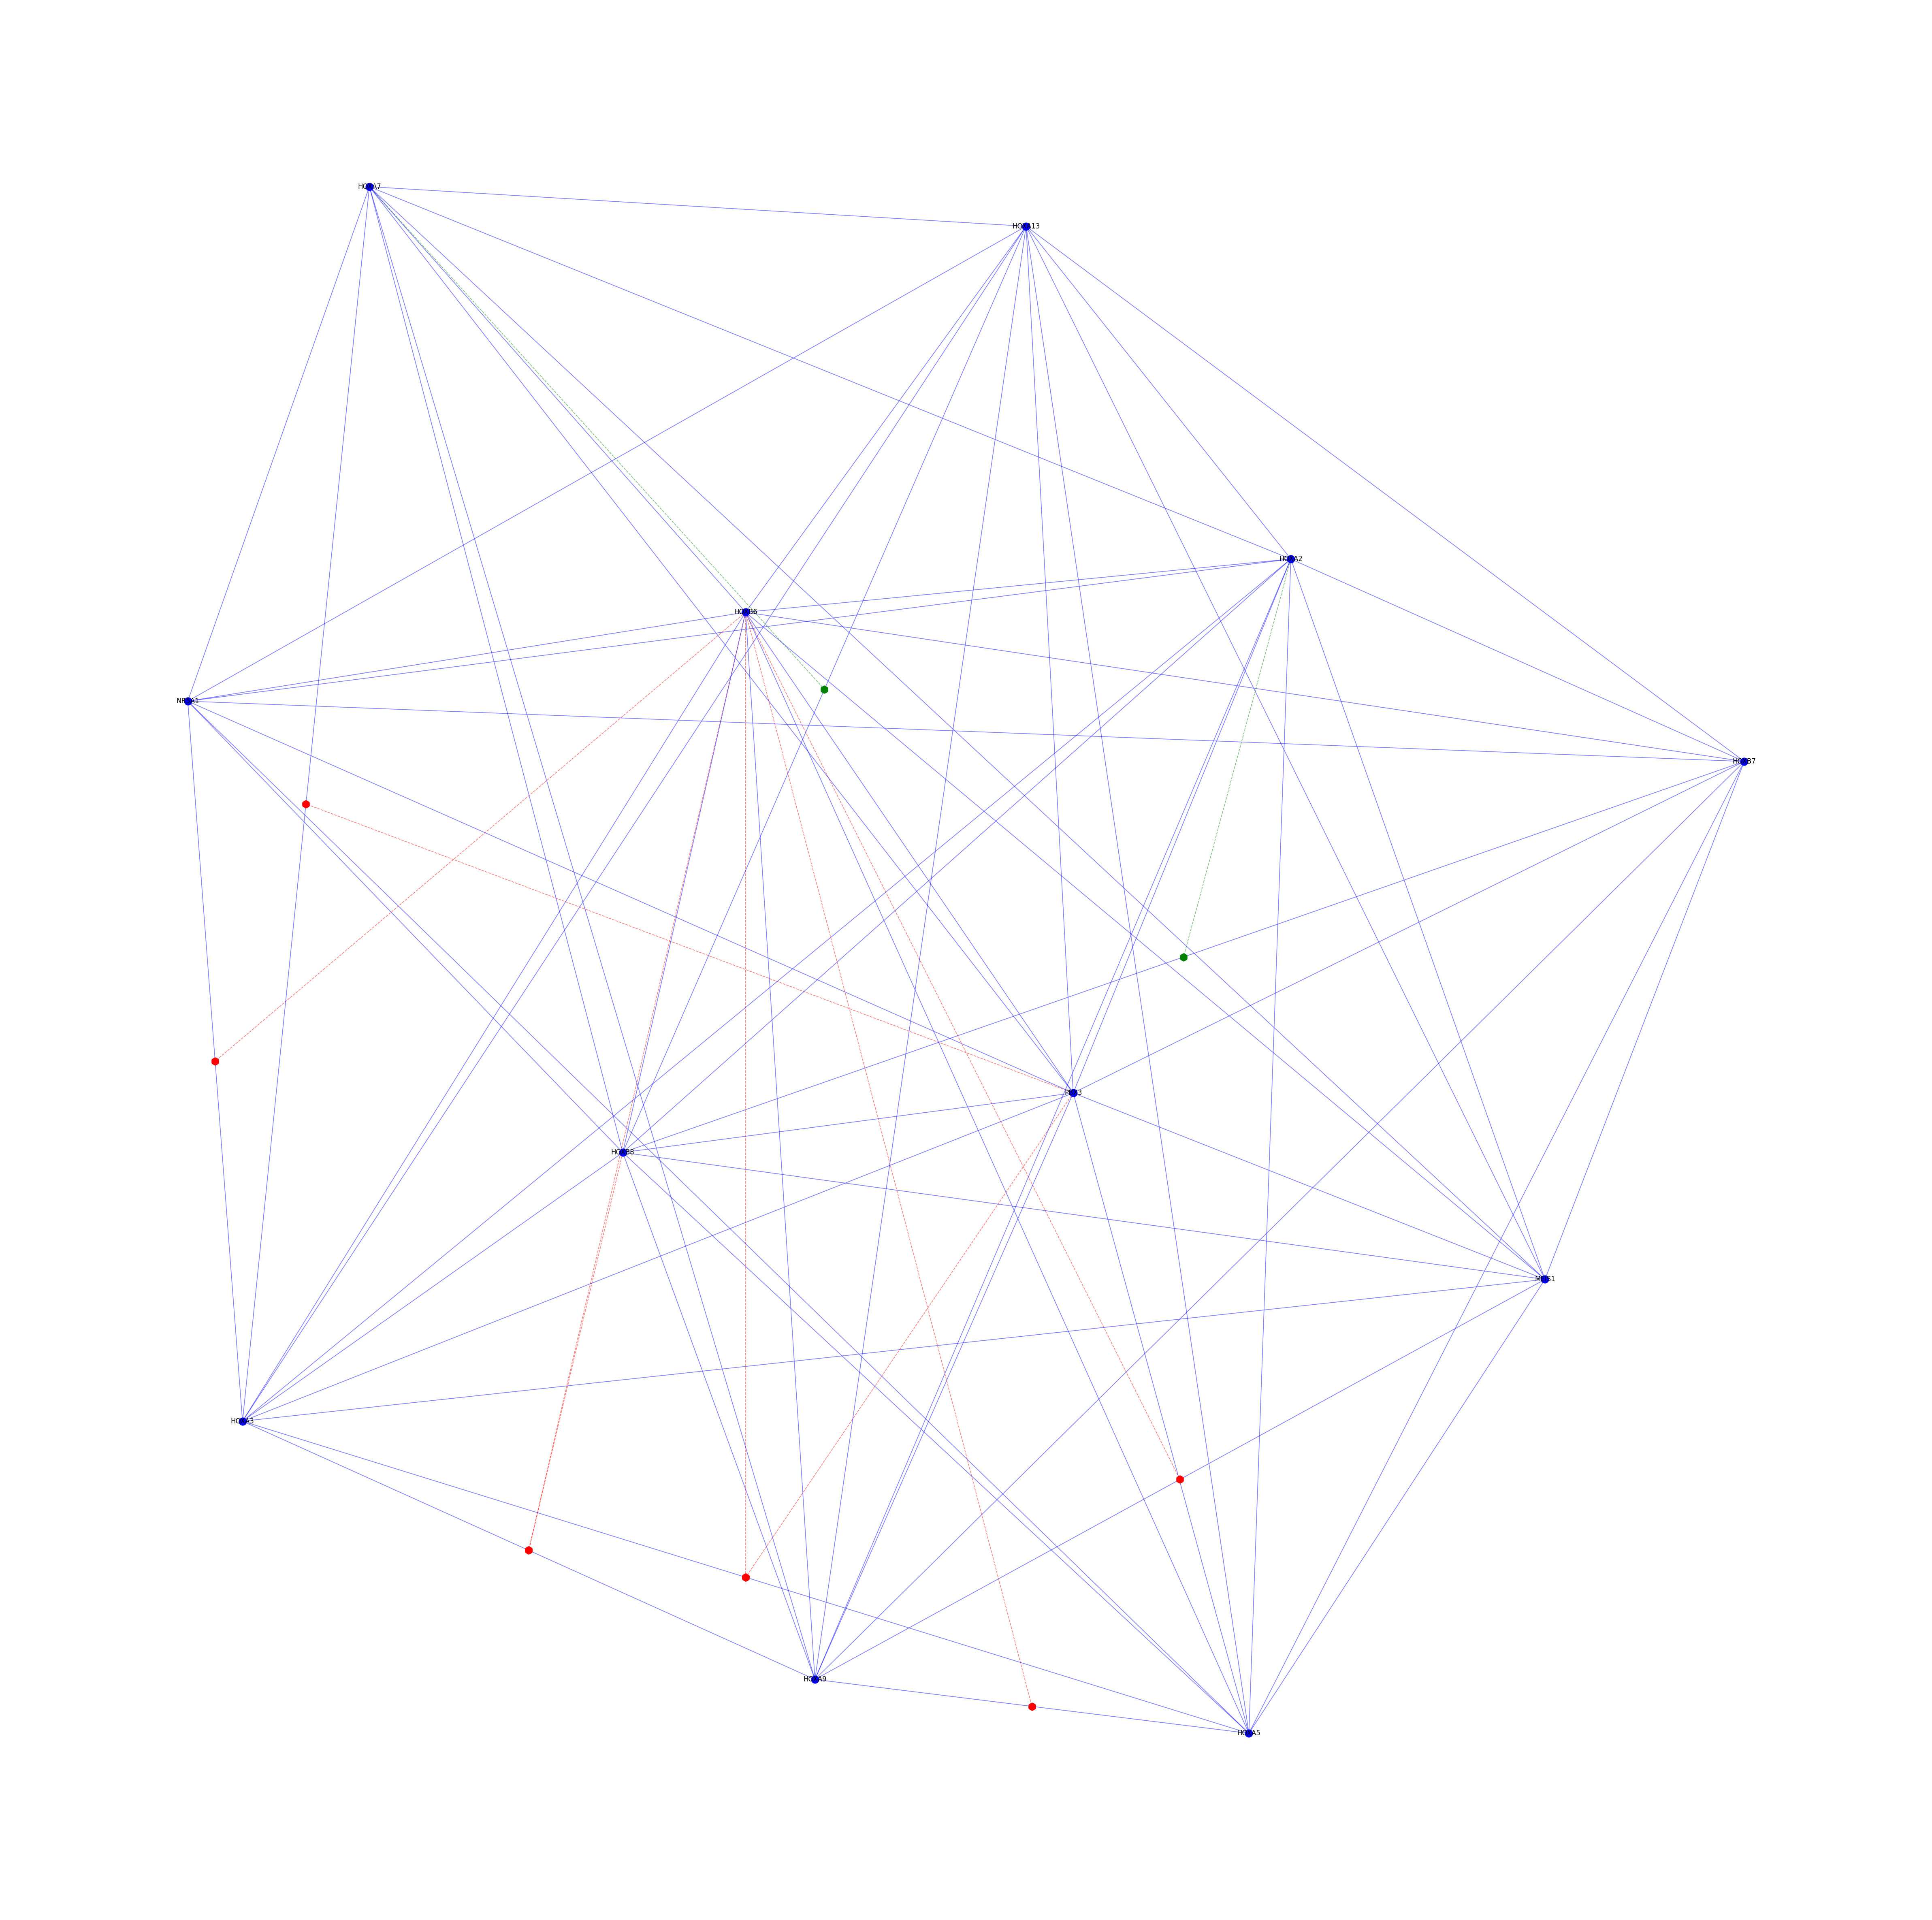

In [10]:
top = 10
ppi = pd.read_csv('data/reduce_ppi.tsv', sep = '\t')
ppi = nx.from_pandas_edgelist(ppi, source = '0', target = '1')
triadic_network_vis_from_data_and_graph(ppi, sub_triadic, top, save_folder = 'output')